C:\Users\Uživatel\AppData\Local\Temp\ipykernel_5872\2607178152.py:21: RuntimeWarning: divide by zero encountered in divide
  x = (b - np.dot(R,x))/D                             # totéž jako dot
C:\Users\Uživatel\AppData\Local\Temp\ipykernel_5872\2607178152.py:28: RuntimeWarning: divide by zero encountered in divide
  x = np.linalg.det(Ai) / np.linalg.det(A)
C:\Users\Uživatel\AppData\Local\Temp\ipykernel_5872\2607178152.py:21: RuntimeWarning: invalid value encountered in divide
  x = (b - np.dot(R,x))/D                             # totéž jako dot
C:\Users\Uživatel\AppData\Local\Temp\ipykernel_5872\2607178152.py:75: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


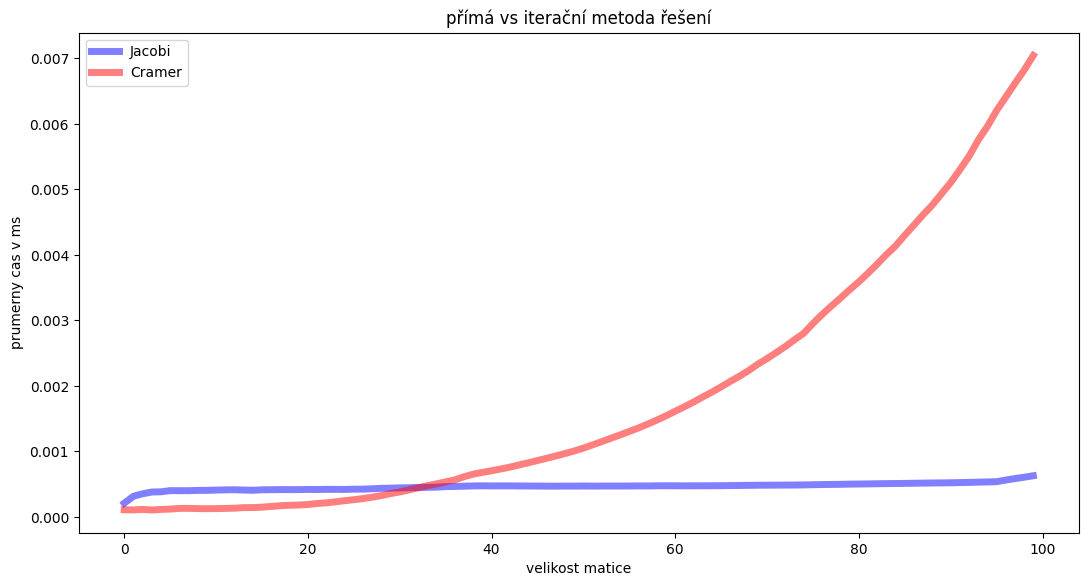

In [106]:
import random
import numpy as np
import sympy
import string
import time
import matplotlib.pyplot as plt

def print_matrix(A, b):                                     # vytiskne matici A a vektor b
    print("Matrix A:")
    for row in A:
        print(row)
    print("RHS b:\n", b)

def jacobi(A, b, niteraci, x0=None):                        # Jacobiho iterační metoda
    x = x0 if x0 else np.ones(len(A))                       # pokud není zadáno x0, samé jedničky
    D = np.diag(A)
    #L = np.tril(A, k = -1)
    #U = np.triu(A, k = 1)
    R = A - np.diagflat(D)                                  # R totéž jako L + U
    for i in range(niteraci):
        x = (b - np.dot(R,x))/D                             # totéž jako dot
    return x

def cramer(A, b):                                           # Cramerovo pravidlo
    N = A.shape[1]
    mask = np.broadcast_to(np.diag([1 for i in range(N)]), [N, N, N]).swapaxes(0, 1)
    Ai = np.where(mask, np.repeat(b, N).reshape(N, N), A)
    x = np.linalg.det(Ai) / np.linalg.det(A)
    return x

def generate_random_matrix(n, amin, amax):                  # generuje matici A a vektor b
    A = np.array([[random.randint(amin, amax) for j in range(n)] for i in range(n)])
    b = np.array([random.randint(amin, amax) for i in range(n)])
    A = A + 10*np.eye(n)             # diagonálně dominantní pro konvergenci iterační metody
    return A, b

number_of_cycles = 100
prumer_jacobi = []
prumer_cramer = []
Ldims = []
J_measured_time = []
C_measured_time = []
dimenze = 100


for dim in range(dimenze): #loop pres definovaný počet dimenzi
    for x in range(number_of_cycles):    #loop pres nekolik iteraci v dane dimenzi                                             
        A, b = generate_random_matrix(n=dim, amin=-10, amax=10)     # generuje matici A a vektor b

        start = time.time()
        x_iter = jacobi(A, b, 50)                                   # Jacobiho iterační metoda
        end = time.time()
        measured_time = (end - start)
        J_measured_time.append(measured_time)
        #print(f"\n\nIteracni reseni (t = {end-start}s):\n{x_iter}\n\n")
    

        start = time.time()
        x_cramer = cramer(A, b)
        end = time.time()
        measured_time = (end - start)                               # Cramerovo pravidlo
        C_measured_time.append(measured_time)
        #print(f"Cramer reseni: (t = {end-start}s):\n{x_cramer}\n\n")


    prumer_cramer.append(np.average(C_measured_time))   #append do listu cramera, zprumerovany ze vsech projetych iteraci v ramci dimenze
    prumer_jacobi.append(np.average(J_measured_time))   #append do listu jacobi, zprumerovany ze vsech projetych iteraci v ramci dimenze
    Ldims.append(dim) 

fig = plt.figure(figsize=(10,5))
ax = fig.add_axes([0.1,0.1,1,1])
ax.plot(Ldims, prumer_jacobi, linewidth=5, label='Jacobi', color='blue', alpha=0.5)
ax.plot(Ldims, prumer_cramer, linewidth=5, label='Cramer', color='red', alpha=0.5)
plt.tight_layout
plt.tight_layout()
plt.xlabel('velikost matice')
plt.ylabel('prumerny cas v ms')
plt.title('přímá vs iterační metoda řešení')
plt.legend()
plt.show()

#fig.savefig('Jacobi_vs_Cramer', bbox_inches='tight', pad_inches=0)


